ResNet 152

In [ ]:
import torch.nn as nn
import torchvision
from torchvision import models
import matplotlib.pyplot as plt
import torch.optim as optim
from torch.optim import lr_scheduler
import warnings
warnings.filterwarnings("ignore")

Class Counter: 4
Class Names: ['DEER', 'FOX', 'SQUIRREL', 'WOLF']
Device: cuda


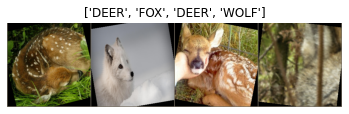

In [2]:
from ipynb.fs.full.main import train_model, test_model, CLASS_COUNTER, device, visualize_model, losses, accuracy_Scores, f1_Scores, precision_Scores, recall_Scores

In [3]:
LEARNING_RATE = 0.001
NUM_EPOCHS = 100

In [4]:
resnet152 = models.resnet152(pretrained=True)
num_ftrs = resnet152.fc.in_features

resnet152.fc = nn.Linear(num_ftrs, CLASS_COUNTER)
resnet152 = resnet152.to(device)
criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer = optim.SGD(resnet152.parameters(), lr=LEARNING_RATE)

step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

Epoch 0/99
----------
[TRAIN] Loss: 0.9905 Acc: 0.6320 F1-Score: 0.1504 Precision: 0.1935 Recall: 0.1590
[VALID] Loss: 0.4351 Acc: 0.9188 F1-Score: 0.2264 Precision: 0.2386 Recall: 0.2297

Epoch 1/99
----------
[TRAIN] Loss: 0.7053 Acc: 0.7620 F1-Score: 0.1938 Precision: 0.2303 Recall: 0.1905
[VALID] Loss: 0.1772 Acc: 0.9820 F1-Score: 0.2447 Precision: 0.2475 Recall: 0.2455

Epoch 2/99
----------
[TRAIN] Loss: 0.5269 Acc: 0.8362 F1-Score: 0.2145 Precision: 0.2405 Recall: 0.2090
[VALID] Loss: 0.1043 Acc: 0.9845 F1-Score: 0.2466 Precision: 0.2493 Recall: 0.2461

Epoch 3/99
----------
[TRAIN] Loss: 0.4694 Acc: 0.8505 F1-Score: 0.2194 Precision: 0.2442 Recall: 0.2126
[VALID] Loss: 0.0731 Acc: 0.9858 F1-Score: 0.2470 Precision: 0.2490 Recall: 0.2465

Epoch 4/99
----------
[TRAIN] Loss: 0.4350 Acc: 0.8583 F1-Score: 0.2211 Precision: 0.2440 Recall: 0.2146
[VALID] Loss: 0.0615 Acc: 0.9858 F1-Score: 0.2468 Precision: 0.2490 Recall: 0.2465

Epoch 5/99
----------
[TRAIN] Loss: 0.4159 Acc: 0.8635 

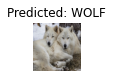

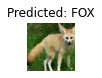

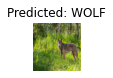

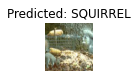

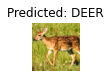

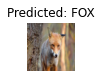

In [5]:
base_model = train_model(resnet152,"resnet", criterion, optimizer, step_lr_scheduler, num_epochs=NUM_EPOCHS)
visualize_model(base_model)
plt.show()

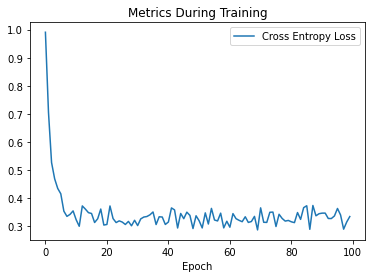

In [7]:
plt.plot(losses, label = "Cross Entropy Loss")
#plt.plot(accuracy_Scores, label = "Accuracy")
plt.xlabel('Epoch')
plt.legend()
plt.title('Metrics During Training');

In [8]:
base_model = test_model(base_model, criterion)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!